In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

1. Background

In [3]:
A = np.array([[1,3,5], [5,4,1], [3,8,6]])

In [4]:
#Use columns as vectors, divide by n instead of n-1
np.cov(A, rowvar=False, bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [5]:
def calculateCovariance(X):
    meanX = np.mean(X, axis=0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance

In [6]:
calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [21]:
def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print("Covariance Matrix:\n", ACov)
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10,10)
    
    #Covariance Plot
    ax0 = plt.subplot(2,2,1)
    #Choose colors
    #pal = sns.color_palette("GnBu", 10)
    cmap = ListedColormap(sns.color_palette("GnBu", 10).as_hex())
    sns.heatmap(ACov, cmap=cmap, vmin=0)
    
    #Data Plot
    ax1 = plt.subplot(2,2,2)
    if (data.shape[1] == 3):
        c = data[:,2]
    else:
        c= "#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)
    #Remove top and right axes
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)

In [8]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1,a2]).T
A.shape

(300, 2)

In [9]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

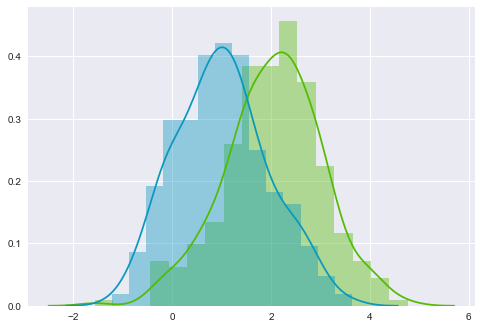

In [10]:
sns.distplot(A[:,0], color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()
plt.close()

Covariance Matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


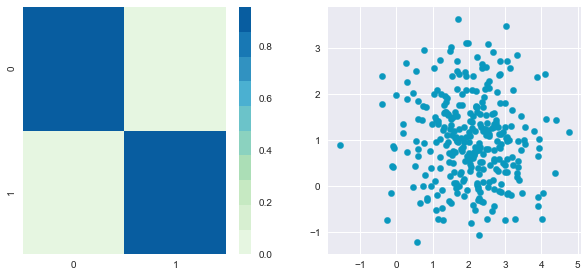

In [17]:
#UNCORRELATED DATA
plotDataAndCov(A)
plt.show()
plt.close()

Covariance Matrix:
 [[ 0.95171641  0.92932561]
 [ 0.92932561  1.12683445]]


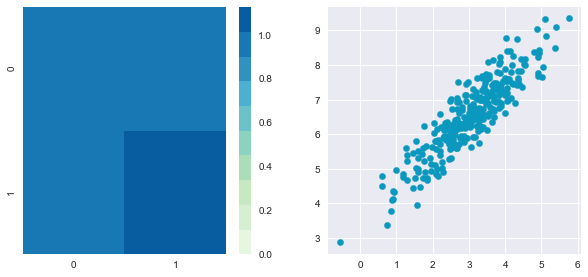

In [20]:
#CORRELATED DATA
np.random.seed(1234)
b1 = np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7,1,300)/2
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

2. Preprocessing

2A. Mean Normalization

In [22]:
def center(X):
    newX = X - np.mean(X, axis=0)
    return newX

Before:


Covariance Matrix:
 [[ 0.95171641  0.92932561]
 [ 0.92932561  1.12683445]]


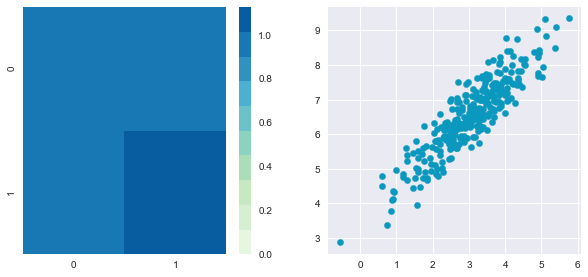

After:


Covariance Matrix:
 [[ 0.95171641  0.92932561]
 [ 0.92932561  1.12683445]]


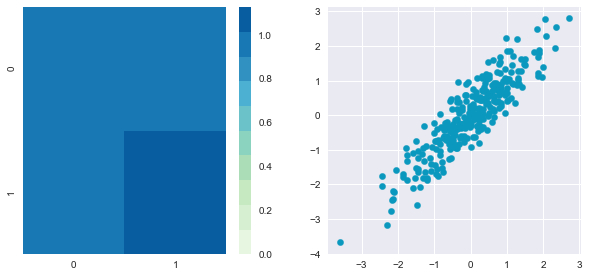

In [24]:
BCentered = center(B)

print("Before:\n\n")

plotDataAndCov(B)
plt.show()
plt.close()

print("After:\n\n")
plotDataAndCov(BCentered)
plt.show()
plt.close()

2B. Standardization or Normalization

In [25]:
def standardize(X):
    newX = center(X)/np.std(X, axis=0)
    return newX

Covariance Matrix:
 [[ 0.95171641  0.83976242]
 [ 0.83976242  6.22529922]]


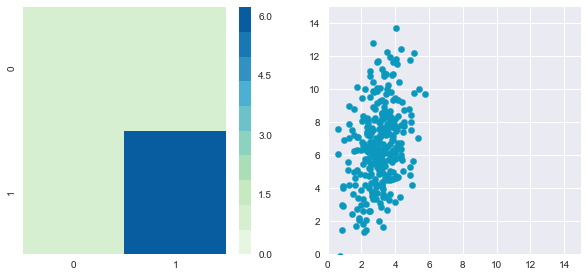

In [26]:
#Check plotting with new data set
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance Matrix:
 [[ 1.          0.34500274]
 [ 0.34500274  1.        ]]


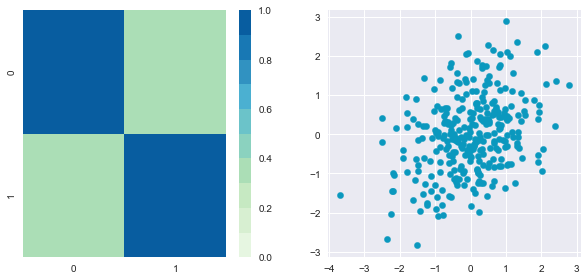

In [27]:
#Standardize above data to get scales the same
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

2C. Whitening

Covariance Matrix:
 [[ 0.95171641  0.83976242]
 [ 0.83976242  6.22529922]]


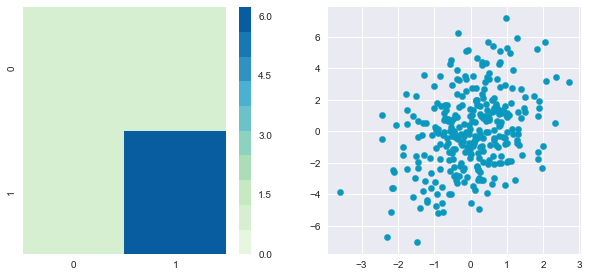

In [28]:
#Want covariance matrix with 1s in the diagonal and 0s in other cells
#I.e. we want the data to have variance of 1 and covariance of 0
#Three steps: 1) Zero-centering; 2) Decorrelating; 3) Rescaling

#1) Zero-centering
CCentered = center(C)
plotDataAndCov(CCentered)
plt.show()
plt.close()

In [31]:
#2) Decorrelating
def decorrelate(X):
    cov = X.T.dot(X)/float(X.shape[0])
    #Calculate eigenvalues and eigenvectors of covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    #Apply eigenvectors to X
    decorrelated = X.dot(eigVecs)
    return decorrelated

Covariance Matrix:
 [[ 0.95171641  0.83976242]
 [ 0.83976242  6.22529922]]


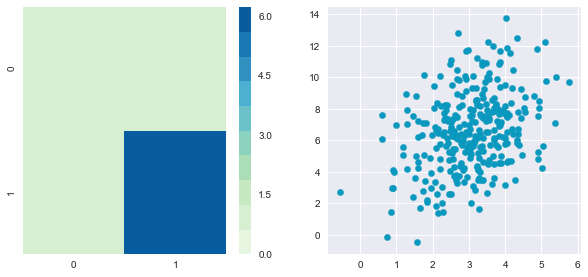

In [39]:
#Plot initial data
plotDataAndCov(C)
plt.show()
plt.close()

Covariance Matrix:
 [[  8.21222171e-01   1.89478063e-16]
 [  1.89478063e-16   6.35579346e+00]]


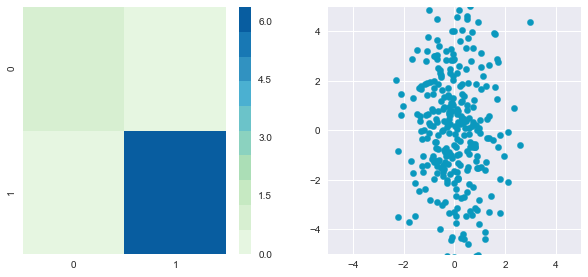

In [41]:
#Plot decorrelated data (separated from above cell due to weird plt interactions)
CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

In [44]:
#3) Rescaling
def whiten(X):
    newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    #Calculate eigenvalues and eigenvectors of covar matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    #Apply eigenvectors to X
    decorrelated = X.dot(eigVecs)
    #Rescale decorrelated data (1e-5 avoids possible division by 0)
    whitened = decorrelated/np.sqrt(eigVals + 1e-5)
    return whitened

Covariance Matrix:
 [[  9.99987823e-01   1.06581410e-16]
 [  1.06581410e-16   9.99998427e-01]]


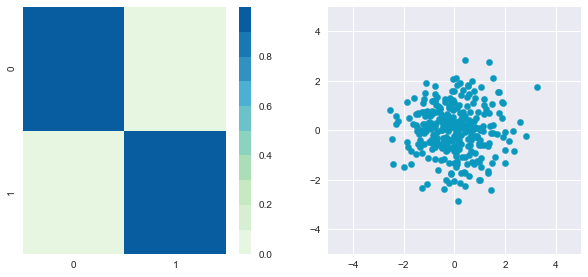

In [46]:
CWhitened = whiten(CCentered)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

3. Image Whitening

In [47]:
#Load CIFAR dataset images
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

Using TensorFlow backend.


170500096/170498071 [==============================] - 40s 0us/step


(50000, 32, 32, 3)

In [48]:
X = X_train[:1000]
print(X.shape)

(1000, 32, 32, 3)


In [50]:
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)

(1000, 3072)


In [52]:
def plotImage(X):
    plt.figure(figsize=(1.5,1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

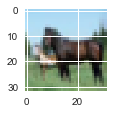

In [53]:
plotImage(X[12,:])

Begin image whitening

In [55]:
#Rescale images to range [0,1]
X_norm = X/255
print("X.min()", X_norm.min())
print("X.max()", X_norm.max())

X.min() 0.0
X.max() 1.0


In [56]:
#Now subtract mean from all images
X_norm.mean(axis=0).shape

(3072,)

In [57]:
X_norm.mean(axis=0)

array([ 0.5234    ,  0.54323137,  0.5274    , ...,  0.50369804,
        0.50011765,  0.45227451])

In [58]:
X_norm = X_norm - X_norm.mean(axis=0)

In [59]:
X_norm.mean(axis=0)

array([ -5.30575583e-16,  -5.98021632e-16,  -4.23439062e-16, ...,
        -1.81965554e-16,  -2.49800181e-16,   3.98570066e-17])

In [61]:
#rowvar=True since each row represents an image
cov = np.cov(X_norm, rowvar=True)
U,S,V = np.linalg.svd(cov)

In [62]:
print(U.shape, S.shape)

(1000, 1000) (1000,)


In [63]:
print (np.diag(S))
print ('\nshape:', np.diag(S).shape)

[[  8.15846654e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   4.68234845e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   2.41075267e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   3.92727365e-05
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    3.52614473e-05   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.35907202e-15]]

shape: (1000, 1000)


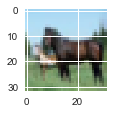

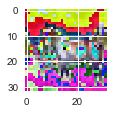

In [64]:
#Zero Components Analysis without rescaling to range [0,1]
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)

plotImage(X[12, :])
plotImage(X_ZCA[12, :])

In [66]:
#Zero Components Analysis with pixels rescaled into [0,1] range
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


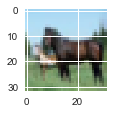

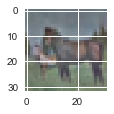

In [67]:
plotImage(X[12, :])
plotImage(X_ZCA_rescaled[12, :])